<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/PROJETO_Clusters_para_criar_playlists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clustering

O Spotify, um serviço de transmissão de áudio, está amplamente disponível em quase todos os países e em diversas plataformas. Seu propósito é conectar criadores e apreciadores de músicas e podcasts por meio de uma plataforma simples, eficiente e agradável. Até o final de 2019, o Spotify contava com mais de 250 milhões de usuários. Dada sua enorme popularidade entre artistas e ouvintes, o Spotify gera uma grande quantidade de dados e os utiliza de forma significativa, especialmente em seus sistemas de recomendação.

<center><img width="60%" src="http://www.luminmusic.com/images/streaming-icon-spotify.png"></center>

Quem usa o Spotify já está acostumado com *features* como:

* Discover Weekly
* Song Radios
* You Year Wrapped

O objetivo deste projeto é criar playlist de acordo com a divisão das músicas com base nos clusters.

## O que é Clustering?


<center><img width="80%" src="https://images.datacamp.com/image/upload/v1659712758/K_means_ff7ba142c8.png"></center>

**Clustering** é uma técnica de **Machine Learning** que faz parte da categoria de Aprendizado Não-Supervisionado.

Basicamente, o objetivo é agrupar conjuntos de dados semelhantes em um mesmo **Cluster**.

O algoritmo mais comum para essa tarefa é o K-Means. Este algoritmo calcula a distância dos pontos até os **Centroids**, que são posicionados no centro (daí o nome) de cada Cluster.



## Como Saber Quantos Clusters Preciso Usar?


<center><img width="70%" src="https://www.researchgate.net/publication/339823520/figure/fig3/AS:867521741733888@1583844709013/The-elbow-method-of-k-means.png"></center>

É importante saber que o algoritmo não vai decidir sozinho quantos clusters usar. É nosso trabalho identificar a quantidade correta de clusters, e passar essa quantidade como parâmetro. Para identificar o melhor número de clusters para nossos dados, nós podemos utilizar, por exemplo, as seguintes métricas:

* Inspeção Visual dos Dados.
* Conhecimento pŕevio sobre os dados/objetivos e um número pré-definidos de clusters.
* O *Elbow Method*, ou, em tradução livre, o "Método do Cotovelo". Esse método compara a distância média de cada ponto até o centro do cluster para diferentes números de clusters.




### K-Means: Informações Importantes

O algoritmo K-Means opera com base na distância entre os pontos, tornando-se altamente sensível à escala dos dados. Portanto, é crucial utilizar ferramentas de pré-processamento, como `StandardScaler` ou `MinMaxScaler`, para padronizar a escala dos dados antes de determinar o número de clusters necessários.

Essas técnicas de pré-processamento fornecem escalas utilizáveis, embora operem de maneiras distintas:

- O `StandardScaler` transforma os dados para ter uma média de 0 e um desvio padrão de 1.
- O `MinMaxScaler` ajusta os números para uma escala entre 0 e 1.

Essencialmente, isso reduz a dispersão entre os pontos. Além disso, essas técnicas ajudam a mitigar o impacto de valores atípicos nos dados.

### Sobre o dataset

Este dataset foi reduzido a 300 entradas de dados oficiais do spotify, lembrando que o meu objetivo é criar playlists de acordo com a separação dos clusters.

In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/df_spotify.csv')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  17 
Entradas:  300


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [5]:
# Selecionando features relevantes
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Padronizando os features
scaler = MinMaxScaler()
df_padronizado= scaler.fit_transform(X)


Agora que os dados estão prontos, vamos descobrir quantos clusters precisaremos.

Irei utilizar o Elbow Method.

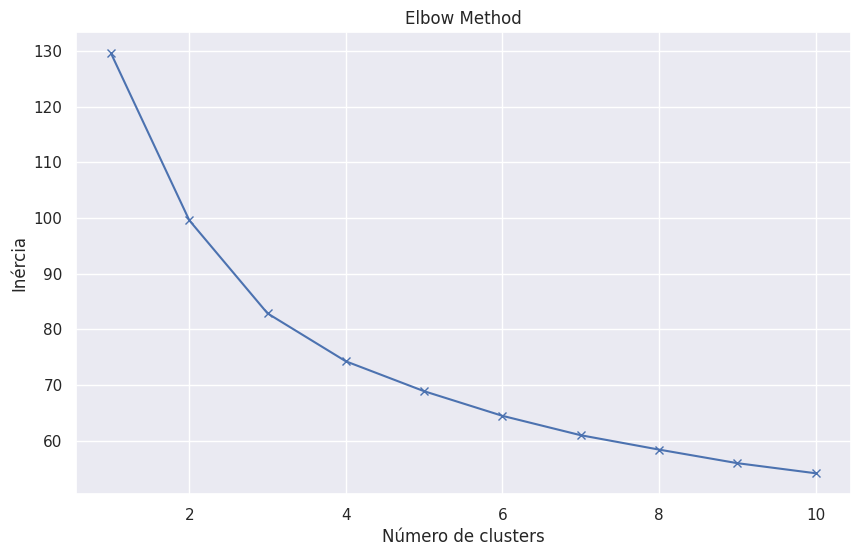

In [7]:
# Elbow method para achar o número de clusters
inertia = []
K = range(1, 11)  # Testando valores de 1 a 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_padronizado)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.show()

In [8]:
# verificar os resultados
print('Lista Com Erros: ', inertia)

Lista Com Erros:  [129.5971854905735, 99.59993063711593, 82.87616695424389, 74.26962852262943, 68.89852094229032, 64.47646114261448, 60.99418890691625, 58.412648734747854, 55.975676904989996, 54.16230920843749]


In [9]:
# diferença entre os elementos
dif = np.diff(inertia)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-29.99725485 -16.72376368  -8.60653843  -5.37110758  -4.4220598
  -3.48227224  -2.58154017  -2.43697183  -1.8133677 ]


Após analisar o gráfico, decidi utilizar 5 clusters, ou seja, terá 5 playlists com base no modelo.

In [10]:
# Criando um modelo de K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_padronizado)

# Adicionando uma coluna dos clusters no dataset
df['cluster'] = clusters

## Visualizar Os Clusters

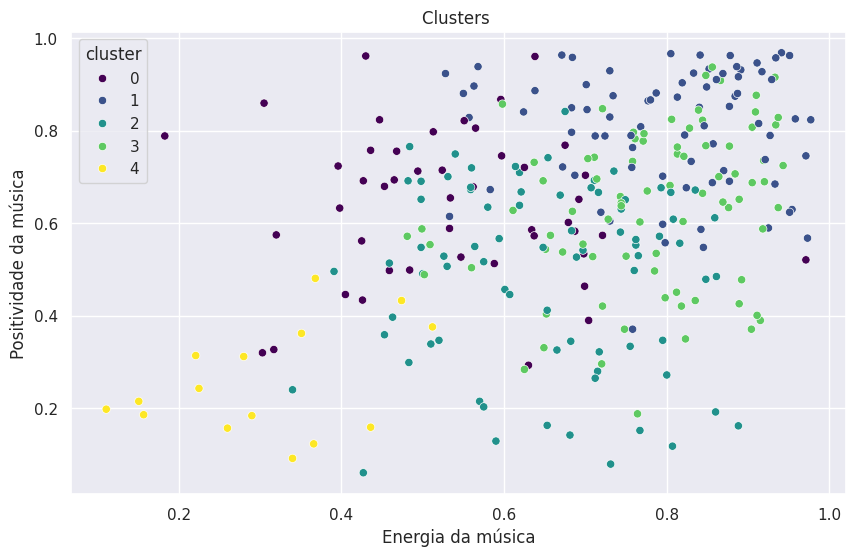

In [14]:
# Criando um gráfico para ver os Clusters com a biblioteca Seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='valence', hue='cluster', data=df, palette='viridis')
plt.title('Clusters ')
plt.xlabel('Energia da música')
plt.ylabel('Positividade da música')
plt.show()

In [17]:
# média de popularidade por cluster
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    78.371795
0    76.565217
1    72.316456
3    68.000000
4    56.933333
Name: popularity, dtype: float64

In [18]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

cluster
3    82
1    79
2    78
0    46
4    15
Name: count, dtype: int64

In [ ]:
# checando as músicas no cluster
df.loc[df['cluster'] == 3][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
72,MC Kevin o Chris,Ela É do Tipo,2x8TNY9KwNvD19gVGs4WOP,76,0.632,0.398,6,-6.615,1,0.3730,0.945,0.000000,0.2280,0.6330,90.695,204931,4,3
74,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.576,0.000000,0.2100,0.0916,101.993,206459,4,3
108,Lewis Capaldi,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,96,0.501,0.405,1,-5.679,1,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161,4,3
206,MC Caverinha,Flash,3UEm2avDtIIaT3UvuvsxES,70,0.913,0.366,7,-14.341,1,0.3290,0.731,0.000023,0.1480,0.1230,125.035,155937,4,3
230,ANAVITÓRIA,relicário,1fZgxJgmmOl8zCyHgcKAWE,65,0.431,0.260,0,-12.001,1,0.0382,0.840,0.000150,0.1040,0.1570,159.567,245539,3,3
271,ANAVITÓRIA,pra você guardei o amor,1TNXJFbHrXe3gVch3HxD7p,62,0.579,0.221,2,-13.962,1,0.0325,0.928,0.002670,0.1090,0.3140,77.113,228785,4,3
283,Billie Eilish,when the party's over,43zdsphuZLzwA9k4DJhU0I,90,0.367,0.111,4,-14.084,1,0.0972,0.978,0.000040,0.0897,0.1980,82.642,196077,4,3
291,ANAVITÓRIA,por onde andei,22AAo9zdJD18OX6tC1VR95,61,0.602,0.474,0,-11.731,1,0.0647,0.925,0.011100,0.1940,0.4330,168.035,208573,4,3
292,Maroon 5,Happy Christmas (War Is Over) - Bonus Track,1nEN1kpLEZ0sJWKRUQT03k,0,0.441,0.157,2,-10.792,1,0.0307,0.936,0.000000,0.1070,0.1860,143.241,206707,3,3
297,ANAVITÓRIA,as coisas tão mais lindas,2qvSChyYgm8ybTncALA4pD,60,0.490,0.290,0,-13.905,1,0.0312,0.844,0.000247,0.1560,0.1840,81.724,218275,4,3


In [19]:
# Criando as playlists
playlist_1 = df[df['cluster'] == 0]
playlist_2 = df[df['cluster'] == 1]
playlist_3 = df[df['cluster'] == 2]
playlist_4 = df[df['cluster'] == 3]
playlist_5 = df[df['cluster'] == 4]

# Salvando as playlists
playlist_1.to_csv('playlist_1.csv', index=False)
playlist_2.to_csv('playlist_2.csv', index=False)
playlist_3.to_csv('playlist_3.csv', index=False)
playlist_4.to_csv('playlist_4.csv', index=False)
playlist_5.to_csv('playlist_5.csv', index=False)

In [21]:
#Vendo a playlist 1 como exemplo
playlist_1.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
13,Pk,Quando a vontade bater (Participação especial ...,26WpOBpHiIMoBuMEIwtOCH,83,0.621,0.700,8,-5.502,1,0.247,0.539,0.0,0.1520,0.704,149.902,166400,4,0
17,Vitão,Complicado,52vPpP2gEYaBROIS77J38P,82,0.734,0.484,7,-7.486,0,0.130,0.570,0.0,0.2240,0.499,130.050,179339,4,0
20,ANAVITÓRIA,Pupila,7Gk5OrMYaMRtT2JmgJVAfk,81,0.716,0.426,10,-9.576,1,0.128,0.401,0.0,0.1100,0.434,88.794,202288,4,0
21,MC G15,Ela Vem,31yFXM26dazFnWI2eoOM5R,81,0.616,0.634,11,-7.389,1,0.546,0.619,0.0,0.0732,0.586,185.186,196800,5,0
32,MC Kevin o Chris,Resenha lá em casa,3NnW2EqJxvHYrRy3upaznl,79,0.674,0.447,5,-3.761,1,0.493,0.688,0.0,0.1820,0.824,150.237,236852,4,0
